In [ ]:
#save the file as .h5

[*********************100%%**********************]  1 of 1 completed


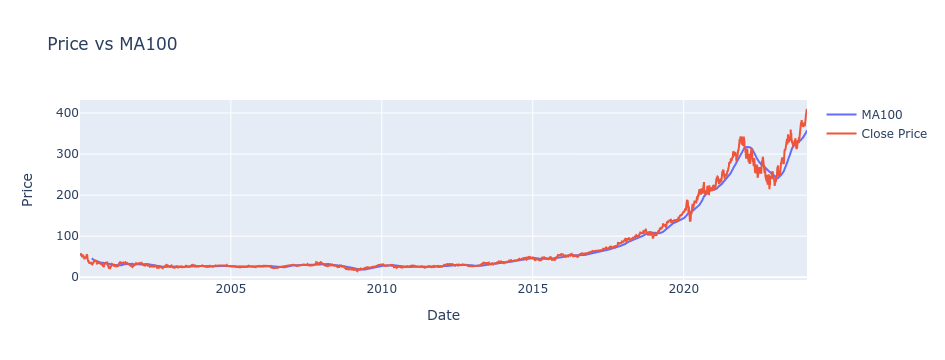

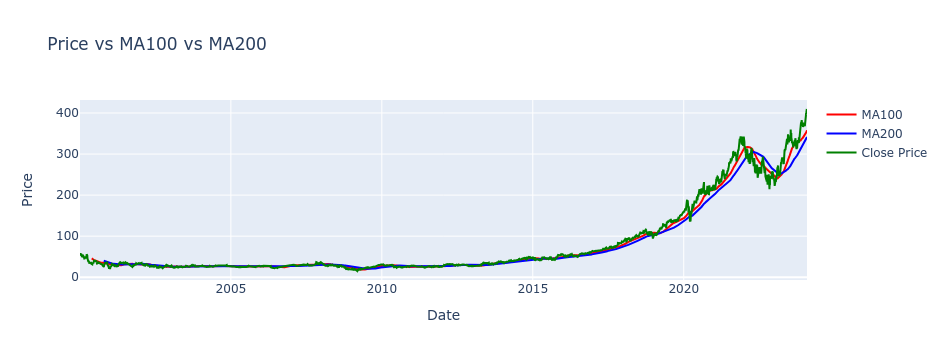

Mean Absolute Error (MAE): 3.350562691096699
Mean Squared Error (MSE): 21.146070425760392


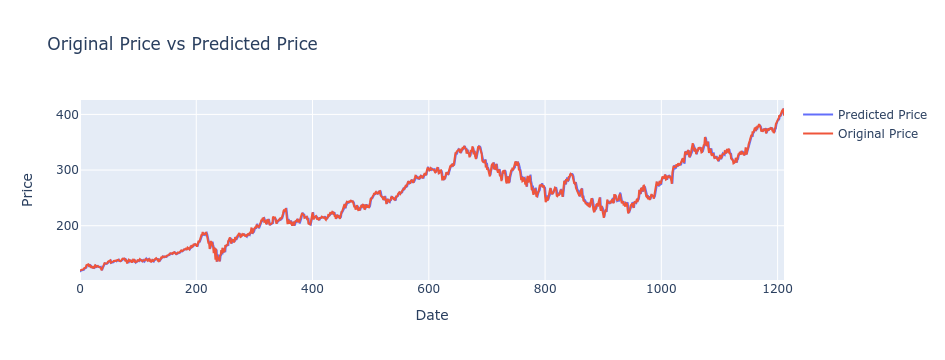

In [18]:
!pip install yfinance plotly

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

start = '2000-01-01'
end = '2024-02-01'
stock = 'MSFT'

data = yf.download(stock, start, end)

# prints the DF
# display(data)

# The 100-day moving average is calculated by summing the past 100 days ClosePx and dividing the result by 100.
# returns a series
ma_100_days = data.Close.rolling(100).mean()

# Plot
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100'))
fig1.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price'))
fig1.update_layout(title='Price vs MA100', xaxis_title='Date', yaxis_title='Price')
fig1.show()

# The 200-day moving average is calculated by summing the past 200 days ClosePx and dividing the result by 200.
# returns a series
ma_200_days = data.Close.rolling(200).mean()

# Plot
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100', line=dict(color='red')))
fig2.add_trace(go.Scatter(x=data.index, y=ma_200_days, mode='lines', name='MA200', line=dict(color='blue')))
fig2.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price', line=dict(color='green')))
fig2.update_layout(title='Price vs MA100 vs MA200', xaxis_title='Date', yaxis_title='Price')
fig2.show()

# Drop NANs
data.dropna(inplace=True)

# takes 80% of the ClosePx for data_train (training)
# takes the remaining 20% of the ClosePx for data_test (testing)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

# Normalization technique
# all features will be transformed into the range [0,1] 
# meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

# fit transforms the data
data_train_scale = scaler.fit_transform(data_train)

x_train = []
y_train = []

# print(data_train_scale.shape) => (4846, 1)

# This creates a sliding window 1 step at a time
# Loop through the range starting from 100 up to the total number of rows in the dataset `data_train_scale`
# Start at 101, grab the first 100 (ClosePx's) and append to x_train then put the 101st into y_train
for i in range(100, data_train_scale.shape[0]):
    # Creating the input sequence for the model- data_train_scale[i-100:i, 0] represents these 100 data points
    x_train.append(data_train_scale[i-100:i, 0])
    # Creating the target value for the model
    y_train.append(data_train_scale[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

joblib.dump(linear_model, 'linear_regression_model.h5')

# Load the model
linear_model = joblib.load('linear_regression_model.h5')

x_test = []
y_test = []

pas_100_days = data_train.tail(100)

data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

data_test_scale  =  scaler.fit_transform(data_test)

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i, 0])
    y_test.append(data_test_scale[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

y_predict = linear_model.predict(x_test.reshape(x_test.shape[0], -1))

y_predict = y_predict.reshape(-1, 1)
y_predict = scaler.inverse_transform(y_predict)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=data_test.index, y=y_predict.flatten(), mode='lines', name='Predicted Price'))
fig3.add_trace(go.Scatter(x=data_test.index, y=y_test.flatten(), mode='lines', name='Original Price'))
fig3.update_layout(title='Original Price vs Predicted Price', xaxis_title='Date', yaxis_title='Price')
fig3.show()


In [ ]:
#save the file as .keras

[*********************100%%**********************]  1 of 1 completed


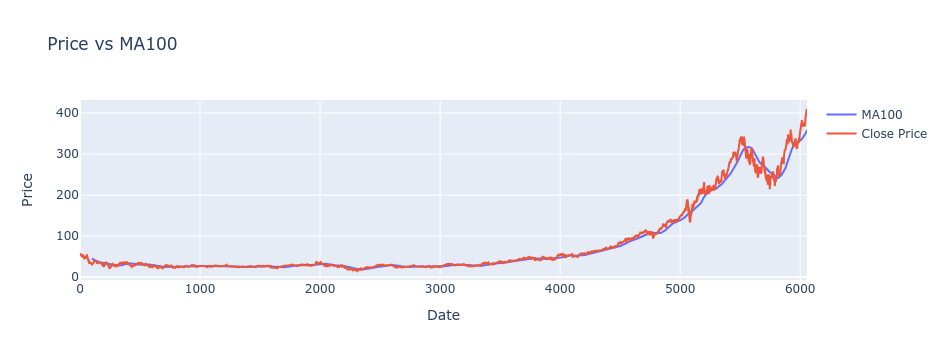

Mean Absolute Error (MAE): 3.350562691096699
Mean Squared Error (MSE): 21.146070425760392


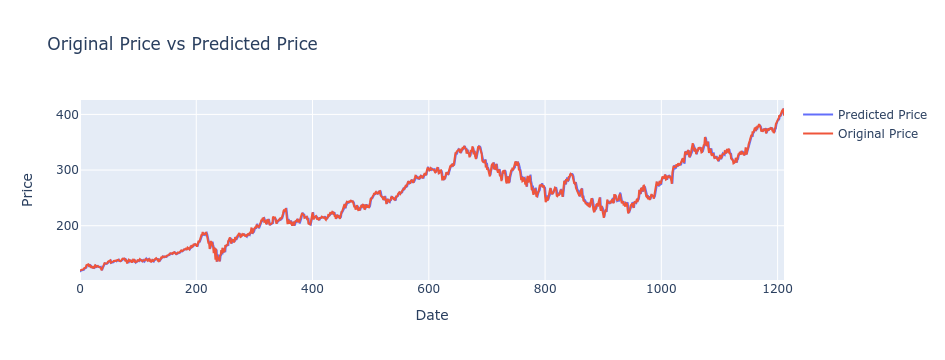

/mnt/sdb1/2ndHome/anaconda3/envs/kaggle/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [19]:
!pip install yfinance plotly tensorflow

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

start = '2000-01-01'
end = '2024-02-01'
stock = 'MSFT'

data = yf.download(stock, start, end)

data.reset_index(inplace=True)

ma_100_days = data.Close.rolling(100).mean()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100'))
fig1.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price'))
fig1.update_layout(title='Price vs MA100', xaxis_title='Date', yaxis_title='Price')
fig1.show()

ma_200_days = data.Close.rolling(200).mean()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100', line=dict(color='red')))
fig2.add_trace(go.Scatter(x=data.index, y=ma_200_days, mode='lines', name='MA200', line=dict(color='blue')))
fig2.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price', line=dict(color='green')))
fig2.update_layout(title='Price vs MA100 vs MA200', xaxis_title='Date', yaxis_title='Price')
fig2.show()

data.dropna(inplace=True)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

scaler = MinMaxScaler(feature_range=(0,1))

data_train_scale = scaler.fit_transform(data_train)

x_train = []
y_train = []

for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i, 0])
    y_train.append(data_train_scale[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

joblib.dump(linear_model, 'linear_regression_model.h5')

# Load the model
# linear_model = joblib.load('linear_regression_model.h5')

x_test = []
y_test = []

pas_100_days = data_train.tail(100)

data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

data_test_scale  =  scaler.fit_transform(data_test)

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i, 0])
    y_test.append(data_test_scale[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

y_predict = linear_model.predict(x_test.reshape(x_test.shape[0], -1))

y_predict = y_predict.reshape(-1, 1)
y_predict = scaler.inverse_transform(y_predict)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=data_test.index, y=y_predict.flatten(), mode='lines', name='Predicted Price'))
fig3.add_trace(go.Scatter(x=data_test.index, y=y_test.flatten(), mode='lines', name='Original Price'))
fig3.update_layout(title='Original Price vs Predicted Price', xaxis_title='Date', yaxis_title='Price')
fig3.show()

# Saving the model as .keras
model = Sequential()
model.add(Dense(1, input_dim=100))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
model.save('linear_regression_model.keras')
